<a href="https://colab.research.google.com/github/unclepete-20/lab7-k-means/blob/main/K_Means.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Laboratorio #7 (K-Means)

## Integrantes:


*   Pedro Pablo Arriola Jimenez (20188)
*   Oscar Fernando Lopez Barrios (20679)
*   Santiago Taracena Puga (20017)
*   YongBum Park (20117)








# Introducción a K-Means Clustering para Análisis de Transacciones Bancarias 💳💰

El análisis de transacciones bancarias es una tarea importante para detectar fraudes, comportamientos inusuales y patrones de gasto de los clientes. Una forma de analizar estos datos es mediante el uso de técnicas de agrupamiento, como el algoritmo de K-Means.

El algoritmo de K-Means es una técnica de aprendizaje no supervisado que permite agrupar datos en clusters o grupos, basado en su similitud. En el caso del análisis de transacciones bancarias, se pueden agrupar los datos según el comportamiento de los clientes, como sus patrones de gasto, lugares frecuentes de uso de tarjeta, entre otros.

La implementación de K-Means en Python es relativamente sencilla gracias a la disponibilidad de diversas librerías como scikit-learn y pandas. A través del uso de esta técnica, se puede obtener una mejor comprensión de los patrones y comportamientos de los clientes, lo que puede ser valioso para la toma de decisiones en el ámbito bancario.

En esta investigación, se explorará el uso de K-Means Clustering para el análisis de transacciones bancarias, incluyendo su implementación en Python y la interpretación de los resultados obtenidos.


## Task 1 - Limpieza de datos y Análisis Exploratorio

La presente parte del task 1, como se menciona, consiste en realizar una limpieza de datos y el análisis exploratorio de los mismos. A continuación se presenta el procedimiento de escalamiento, codificación, y finalmente posterior análisis exploratorio de los datos presentados con el objetivo de la realización del laboratorio.

In [65]:
# Librerías necesarias para la limpieza de datos y análisis exploratorio.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import pairwise_distances

In [66]:
# Se carga el dataset para comenzar a realizar limpieza y exploración.
data = pd.read_csv("./data/bank_transactions.csv")
data

,TransactionID,CustomerID,CustomerDOB,CustGender,CustLocation,CustAccountBalance,TransactionDate,TransactionTime,TransactionAmount (INR)
0,T1,C5841053,10/1/94,F,JAMSHEDPUR,17819.05,2/8/16,143207,25.0
1,T2,C2142763,4/4/57,M,JHAJJAR,2270.69,2/8/16,141858,27999.0
2,T3,C4417068,26/11/96,F,MUMBAI,17874.44,2/8/16,142712,459.0
3,T4,C5342380,14/9/73,F,MUMBAI,866503.21,2/8/16,142714,2060.0
4,T5,C9031234,24/3/88,F,NAVI MUMBAI,6714.43,2/8/16,181156,1762.5
...,...,...,...,...,...,...,...,...,...
1048562,T1048563,C8020229,8/4/90,M,NEW DELHI,7635.19,18/9/16,184824,799.0
1048563,T1048564,C6459278,20/2/92,M,NASHIK,27311.42,18/9/16,183734,460.0
1048564,T1048565,C6412354,18/5/89,M,HYDERABAD,221757.06,18/9/16,183313,770.0
1048565,T1048566,C6420483,30/8/78,M,VISAKHAPATNAM,10117.87,18/9/16,184706,1000.0


La tabla muestra información sobre transacciones financieras. A continuación se describe el significado de cada columna:

- TransactionID: un identificador único para cada transacción
- CustomerID: un identificador único para cada cliente
- CustomerDOB: la fecha de nacimiento del cliente
- CustGender: el género del cliente
- CustLocation: la ubicación geográfica del cliente
- CustAccountBalance: el saldo de la cuenta del cliente
- TransactionDate: la fecha de la transacción
- TransactionTime: la hora de la transacción
- TransactionAmount (INR): la cantidad de la transacción en rupias indias (INR).

Con esta información, se procederá con la limpieza y codificación de los datos.

In [67]:
# Se eliminan estas variables categóricas que no sirven ningún propósito.
data = data.drop(["TransactionID", "CustomerID", "CustomerDOB", "TransactionDate"], axis=1)
data.head()

,CustGender,CustLocation,CustAccountBalance,TransactionTime,TransactionAmount (INR)
0,F,JAMSHEDPUR,17819.05,143207,25.0
1,M,JHAJJAR,2270.69,141858,27999.0
2,F,MUMBAI,17874.44,142712,459.0
3,F,MUMBAI,866503.21,142714,2060.0
4,F,NAVI MUMBAI,6714.43,181156,1762.5


In [68]:
# Se hace un mapeo para codificar el género del cliente.
gender_map = { "M": 1, "F": 0 }
data["CustGender"] = data["CustGender"].replace(gender_map)

# Convertimos la columna a valores numéricos.
data["CustGender"] = pd.to_numeric(data["CustGender"], errors="coerce")
data.head()

,CustGender,CustLocation,CustAccountBalance,TransactionTime,TransactionAmount (INR)
0,0.0,JAMSHEDPUR,17819.05,143207,25.0
1,1.0,JHAJJAR,2270.69,141858,27999.0
2,0.0,MUMBAI,17874.44,142712,459.0
3,0.0,MUMBAI,866503.21,142714,2060.0
4,0.0,NAVI MUMBAI,6714.43,181156,1762.5


In [69]:
# Verificación de la cantidad de valores nulos.
null_data = data.isnull().sum()
null_data / len(data)

CustGender                 0.001050
CustLocation               0.000144
CustAccountBalance         0.002259
TransactionTime            0.000000
TransactionAmount (INR)    0.000000
dtype: float64

In [70]:
# Se eliminan datos faltantes o nulos.
data = data.dropna()
data.head()

,CustGender,CustLocation,CustAccountBalance,TransactionTime,TransactionAmount (INR)
0,0.0,JAMSHEDPUR,17819.05,143207,25.0
1,1.0,JHAJJAR,2270.69,141858,27999.0
2,0.0,MUMBAI,17874.44,142712,459.0
3,0.0,MUMBAI,866503.21,142714,2060.0
4,0.0,NAVI MUMBAI,6714.43,181156,1762.5


In [71]:
# Escalamiento de la data con StandardScaler.
from sklearn.preprocessing import StandardScaler

# Proceso de escalamiento de la data.
scaler = StandardScaler()
data[["CustAccountBalance", "TransactionAmount (INR)"]] = scaler.fit_transform(data[["CustAccountBalance", "TransactionAmount (INR)"]])
data.head()

,CustGender,CustLocation,CustAccountBalance,TransactionTime,TransactionAmount (INR)
0,0.0,JAMSHEDPUR,-0.115327,143207,-0.235558
1,1.0,JHAJJAR,-0.133684,141858,4.022106
2,0.0,MUMBAI,-0.115261,142712,-0.169503
3,0.0,MUMBAI,0.886688,142714,0.074170
4,0.0,NAVI MUMBAI,-0.128438,181156,0.028891


In [72]:
# Balanceo de la data utilizando la mediana de las columnas respectivas.
median_balance = data[["CustAccountBalance"]].median()
fill_median = data[["CustAccountBalance"]].fillna(median_balance)
data.loc[:, "CustAccountBalance"] = fill_median
data.head()

,CustGender,CustLocation,CustAccountBalance,TransactionTime,TransactionAmount (INR)
0,0.0,JAMSHEDPUR,-0.115327,143207,-0.235558
1,1.0,JHAJJAR,-0.133684,141858,4.022106
2,0.0,MUMBAI,-0.115261,142712,-0.169503
3,0.0,MUMBAI,0.886688,142714,0.074170
4,0.0,NAVI MUMBAI,-0.128438,181156,0.028891


In [73]:
# LabelEncoder importado para codificar la variable categórica.
from sklearn.preprocessing import LabelEncoder

# Codificación de la variable categórica.
le = LabelEncoder()
data.loc[:, "CustLocation"] = le.fit_transform(data["CustLocation"])
data.head()

/var/folders/px/hgwfbp6x6h7935z1rly0brtm0000gn/T/ipykernel_98966/31492479.py:6: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  data.loc[:, "CustLocation"] = le.fit_transform(data["CustLocation"])


,CustGender,CustLocation,CustAccountBalance,TransactionTime,TransactionAmount (INR)
0,0.0,3567,-0.115327,143207,-0.235558
1,1.0,3629,-0.133684,141858,4.022106
2,0.0,5242,-0.115261,142712,-0.169503
3,0.0,5242,0.886688,142714,0.074170
4,0.0,5631,-0.128438,181156,0.028891


In [74]:
# Ahora se hace una breve descripción estadística de los datos.
data.describe()

,CustGender,CustLocation,CustAccountBalance,TransactionTime,TransactionAmount (INR)
count,1.044946e+06,1.044946e+06,1.044946e+06,1.044946e+06,1.044946e+06
mean,7.308559e-01,4.104684e+03,-3.016393e-17,1.571001e+05,1.332217e-16
std,4.435152e-01,2.377073e+03,1.000000e+00,5.126609e+04,1.000000e+00
min,0.000000e+00,0.000000e+00,-1.363652e-01,0.000000e+00,-2.393632e-01
25%,0.000000e+00,2.062000e+03,-1.307740e-01,1.240330e+05,-2.148589e-01
50%,1.000000e+00,4.101000e+03,-1.165098e-01,1.642360e+05,-1.694239e-01
75%,1.000000e+00,5.766000e+03,-6.823476e-02,2.000160e+05,-5.672226e-02
max,1.000000e+00,9.325000e+03,1.356825e+02,2.359590e+05,2.371992e+02


In [75]:
# También se obtiene un poco sobre la informacion de los datos.
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1044946 entries, 0 to 1048566
Data columns (total 5 columns):
 #   Column                   Non-Null Count    Dtype  
---  ------                   --------------    -----  
 0   CustGender               1044946 non-null  float64
 1   CustLocation             1044946 non-null  int64  
 2   CustAccountBalance       1044946 non-null  float64
 3   TransactionTime          1044946 non-null  int64  
 4   TransactionAmount (INR)  1044946 non-null  float64
dtypes: float64(3), int64(2)
memory usage: 47.8 MB


In [76]:
# Se explora la cantidad de ubicaciones para tener una noción sobre la variable.
data.groupby("CustLocation").size()

CustLocation
0       11
1        1
2       21
3        5
4       11
        ..
9321     1
9322     6
9323     4
9324     9
9325     1
Length: 9326, dtype: int64

## Task 1.1 - K-Mean Clustering

El presente task, posterior a la limpieza y análisis exploratorio de los datos proporcionados, consiste en la implementación del modelo de K-Means por parte de nuestro equipo de trabajo. A continuación se encuentran todas las funciones necesarias para la implementación del modelo por cuenta propia.

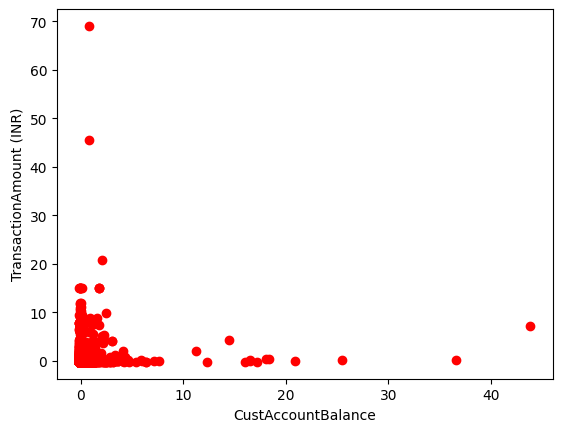

In [77]:
# Comenzamos seleccionando las variables que nos interesan.
X = data[["CustAccountBalance", "TransactionAmount (INR)"]]


# Se grafican los puntos del dataset.
plt.scatter(X["CustAccountBalance"], X["TransactionAmount (INR)"], c="red")
plt.xlabel("CustAccountBalance")
plt.ylabel("TransactionAmount (INR)")
plt.show()

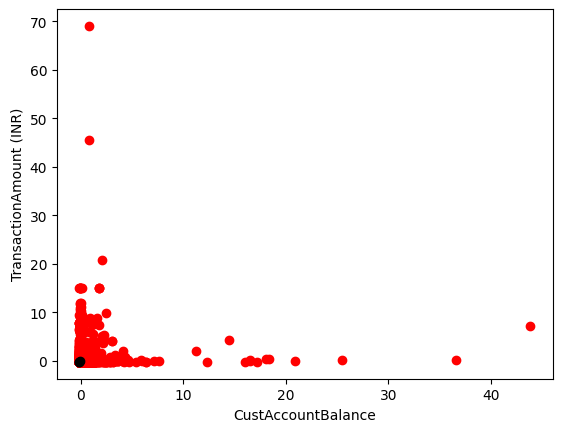

In [78]:
# Step 1 and 2 - Choose the number of clusters (k) and select random centroid for each cluster

#number of clusters
K=3

# Select random observation as centroids
Centroids = (X.sample(n=K))

plt.scatter(X["CustAccountBalance"], X["TransactionAmount (INR)"], c="red")
plt.scatter(Centroids["CustAccountBalance"], Centroids["TransactionAmount (INR)"], c="black")
plt.xlabel("CustAccountBalance")
plt.ylabel("TransactionAmount (INR)")
plt.show()

In [79]:
# Step 3 - Assign all the points to the closest cluster centroid
# Step 4 - Recompute centroids of newly formed clusters
# Step 5 - Repeat step 3 and 4

inertia = 0
diff = 1
j = 0

while (diff != 0):
    XD = X
    i = 1
    for index1, row_c in Centroids.iterrows():
        ED = []
        for index2, row_d in XD.iterrows():
            d1 = (row_c["CustAccountBalance"] - row_d["CustAccountBalance"]) ** 2
            d2 = (row_c["TransactionAmount (INR)"] - row_d["TransactionAmount (INR)"]) ** 2
            d = np.sqrt(d1 + d2)
            ED.append(d)
        X[i] = ED
        i += 1

    C = []
    for index, row in X.iterrows():
        min_dist = row[1]
        pos = 1
        for i in range(K):
            if (row[i + 1] < min_dist):
                min_dist = row[i + 1]
                pos = i + 1
        C.append(pos)
        inertia += min_dist ** 2  # Add squared distance to inertia
    X["Cluster"] = C
    Centroids_new = X.groupby(["Cluster"]).mean()[["TransactionAmount (INR)", "CustAccountBalance"]]
    if (j == 0):
        diff = 1
        j += 1
    else:
        diff = (Centroids_new["TransactionAmount (INR)"] - Centroids["TransactionAmount (INR)"]).sum() + (Centroids_new["CustAccountBalance"] - Centroids["CustAccountBalance"]).sum()
        print(diff.sum())
    Centroids = X.groupby(["Cluster"]).mean()[["TransactionAmount (INR)", "CustAccountBalance"]]


1.3118116306537848
2.11397846990676
2.772701403269642
2.503229427180808
2.3643561365284436
1.1869908173703576
0.5601473550590597
0.15212043270777653
0.5430331384319941
0.2876512812791302
0.6549400791329769
0.739592567437801
0.9336078169159885
1.7209270376610153
2.5669239732487363
5.966501500539549
5.387257508513404
0.0


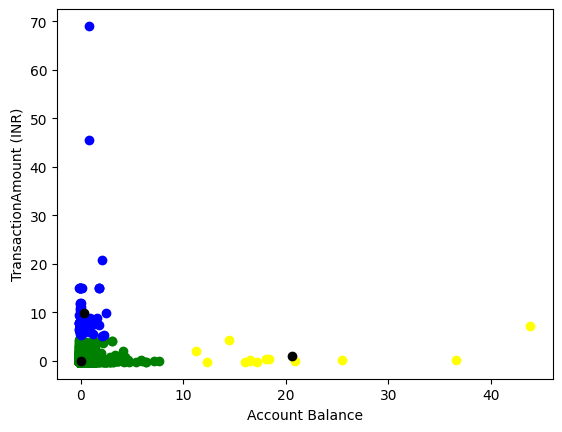

In [80]:
color=["yellow","green","blue"]
for k in range(K):
    data=X[X["Cluster"] == k + 1]
    plt.scatter(data["CustAccountBalance"],data["TransactionAmount (INR)"], c=color[k])
plt.scatter(Centroids["CustAccountBalance"],Centroids["TransactionAmount (INR)"], c="black")
plt.xlabel("Account Balance")
plt.ylabel("TransactionAmount (INR)")
plt.show()

In [81]:
print("Metricas de desempeño")
print("\nInertia:", inertia)

# Calculate Davies-Bouldin Index
cluster_labels = np.unique(C)
n_clusters = cluster_labels.shape[0]
cluster_centers = Centroids_new[["TransactionAmount (INR)", "CustAccountBalance"]].values
cluster_distances = pairwise_distances(cluster_centers)
cluster_variances = [np.mean(pairwise_distances(X[C == i], metric='euclidean')) for i in cluster_labels]
Rij = np.zeros((n_clusters, n_clusters))
for i in range(n_clusters):
    for j in range(n_clusters):
        if i != j:
            Rij[i, j] = (cluster_variances[i] + cluster_variances[j]) / cluster_distances[i, j]
db_index = np.max(np.sum(Rij, axis=1) / n_clusters)
print("Davies-Bouldin Index:", db_index)
    
# Calculate Calinski-Harabasz Index
CH = (inertia / (K - 1)) / ((X.shape[0] - K) / (X.shape[0] - 1))
print("Calinski-Harabasz Index:", CH)

Metricas de desempeño

Inertia: 282791.40708152374
Davies-Bouldin Index: 0.7282532947681913
Calinski-Harabasz Index: 141423.99116775813


### Task 1.2 - K-Means Clustering con librería

In [82]:
# Comenzamos importando las librerías importantes para implementar dicho modelo
%matplotlib inline
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

data.info()
data.columns = data.columns.astype(str)
pca = PCA()
pca.fit(data)
pca.explained_variance_ratio_

<class 'pandas.core.frame.DataFrame'>
Int64Index: 83 entries, 193 to 9906
Data columns (total 6 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   CustAccountBalance       83 non-null     float64
 1   TransactionAmount (INR)  83 non-null     float64
 2   1                        83 non-null     float64
 3   2                        83 non-null     float64
 4   3                        83 non-null     float64
 5   Cluster                  83 non-null     int64  
dtypes: float64(5), int64(1)
memory usage: 4.5 KB


array([9.72302772e-01, 2.30616527e-02, 4.29729873e-03, 3.34949977e-04,
       3.32678136e-06, 0.00000000e+00])

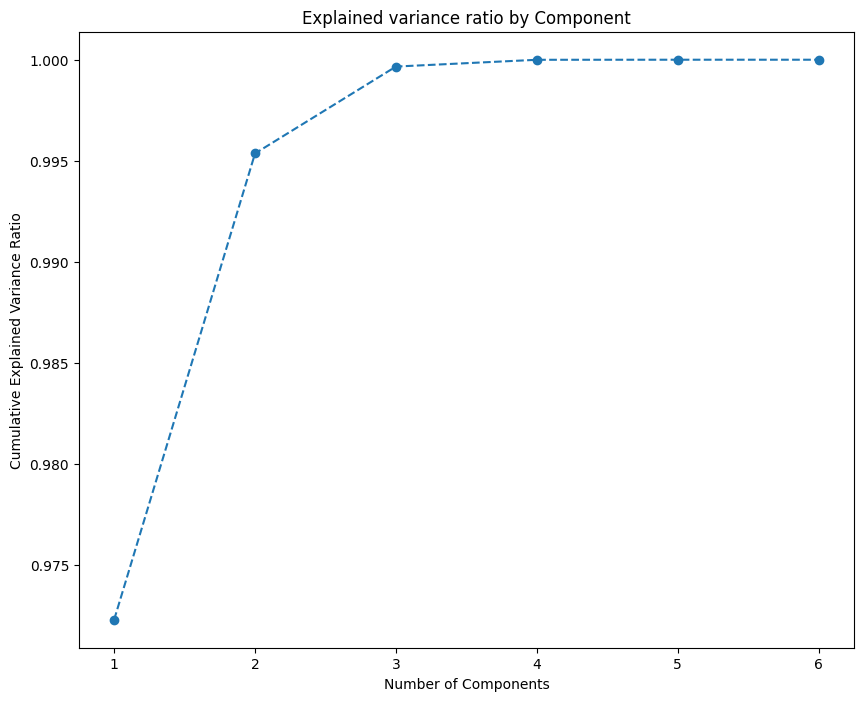

In [83]:
plt.figure(figsize = (10, 8))
plt.plot(range(1, 7), pca.explained_variance_ratio_.cumsum(), marker = "o", linestyle = "--")
plt.title("Explained variance ratio by Component")
plt.xlabel("Number of Components")
plt.ylabel("Cumulative Explained Variance Ratio")
plt.show()

In [84]:
pca = PCA(n_components=2)
pca.fit(data)
pca_scores = pca.transform(data)

pca_scores

array([[ 6.88381702e+00, -2.91578387e+00],
       [ 1.69974787e+01, -2.42081070e+00],
       [-4.35219600e+00,  1.28662249e+00],
       [-3.82989356e+00, -1.39077000e-01],
       [-5.58952514e+00,  3.86077502e+00],
       [-3.12321596e+00, -1.51603202e+00],
       [-4.00446071e+00,  6.59490313e-01],
       [ 6.92715695e+00, -2.89651959e+00],
       [ 6.93662573e+00, -2.89217356e+00],
       [ 6.46537262e+00, -2.98346215e+00],
       [-2.68788231e+00, -2.07763493e+00],
       [ 6.46537262e+00, -2.98346215e+00],
       [-3.95098536e+00,  1.69165379e-01],
       [-2.54638527e+00, -2.45668285e+00],
       [-4.00446071e+00,  6.59490313e-01],
       [-5.14199453e+00,  3.04650615e+00],
       [-3.86892155e+00, -3.98655633e-01],
       [ 6.46537262e+00, -2.98346215e+00],
       [-3.84647794e+00, -3.58664575e-01],
       [ 1.18764588e-01, -3.23953974e+00],
       [-3.65017882e+00, -4.91249665e-02],
       [-3.64790325e+00, -4.78009730e-02],
       [-4.44626080e+00,  6.28527147e-01],
       [ 1.

### Método del codo para determinar el número de clusters

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to '

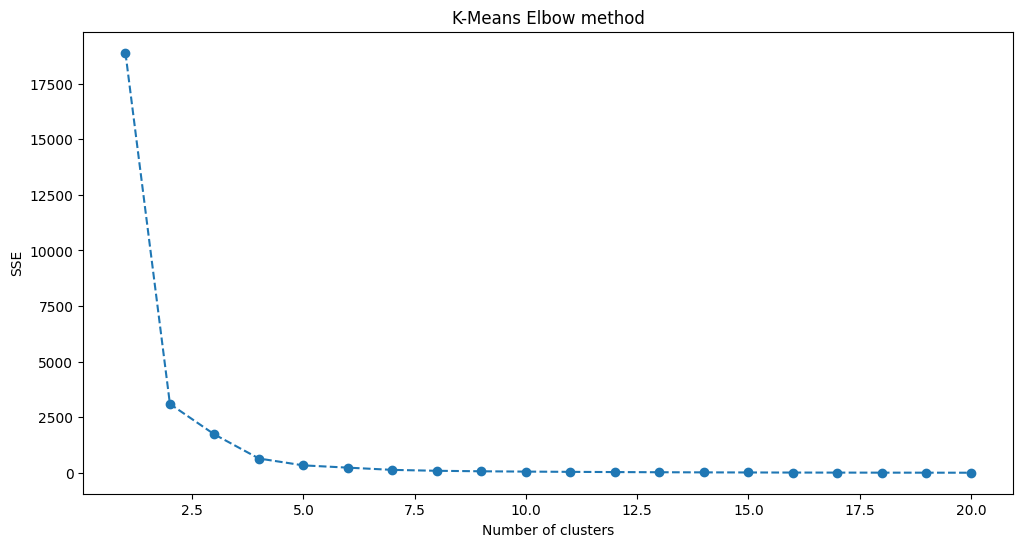

In [85]:
# fitting multiple k-means algorithms and storing the values in an empty list
SSE = []
for cluster in range(1,21):
    kmeans = KMeans(n_clusters = cluster, init="k-means++", random_state= 42)
    kmeans.fit(data)
    SSE.append(kmeans.inertia_)

plt.figure(figsize=(12,6))
plt.plot(range(1, 21), SSE, marker="o", linestyle="--")
plt.xlabel("Number of clusters")
plt.ylabel("SSE")
plt.title("K-Means Elbow method")
plt.show()

In [86]:
# k means using 5 clusters and k-means++ initialization
kmeans = KMeans(n_clusters = 3, init="k-means++", random_state=42)
kmeans.fit(data)
pred = kmeans.predict(data)

np.unique(pred)

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


array([0, 1, 2], dtype=int32)

In [87]:
data["Segment K-Means"] = kmeans.labels_
data.head()

/var/folders/px/hgwfbp6x6h7935z1rly0brtm0000gn/T/ipykernel_98966/1921380541.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["Segment K-Means"] = kmeans.labels_


,CustAccountBalance,TransactionAmount (INR),1,2,3,Cluster,Segment K-Means
193,0.020904,14.980715,24.823642,15.029860,5.075292,3,2
206,2.068192,20.747602,27.015675,20.900571,10.980300,3,2
245,-0.044128,6.958212,21.450835,7.007388,2.972942,3,0
247,0.291274,7.827278,21.386771,7.882254,2.085208,3,0
313,0.025871,5.315965,20.991177,5.365212,4.604017,3,0


In [88]:
data["Segment"] = data["Segment K-Means"].map({0:"First", 1:"Second", 2:"Third"})
data.head()

/var/folders/px/hgwfbp6x6h7935z1rly0brtm0000gn/T/ipykernel_98966/1596210995.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["Segment"] = data["Segment K-Means"].map({0:"First", 1:"Second", 2:"Third"})


,CustAccountBalance,TransactionAmount (INR),1,2,3,Cluster,Segment K-Means,Segment
193,0.020904,14.980715,24.823642,15.029860,5.075292,3,2,Third
206,2.068192,20.747602,27.015675,20.900571,10.980300,3,2,Third
245,-0.044128,6.958212,21.450835,7.007388,2.972942,3,0,First
247,0.291274,7.827278,21.386771,7.882254,2.085208,3,0,First
313,0.025871,5.315965,20.991177,5.365212,4.604017,3,0,First


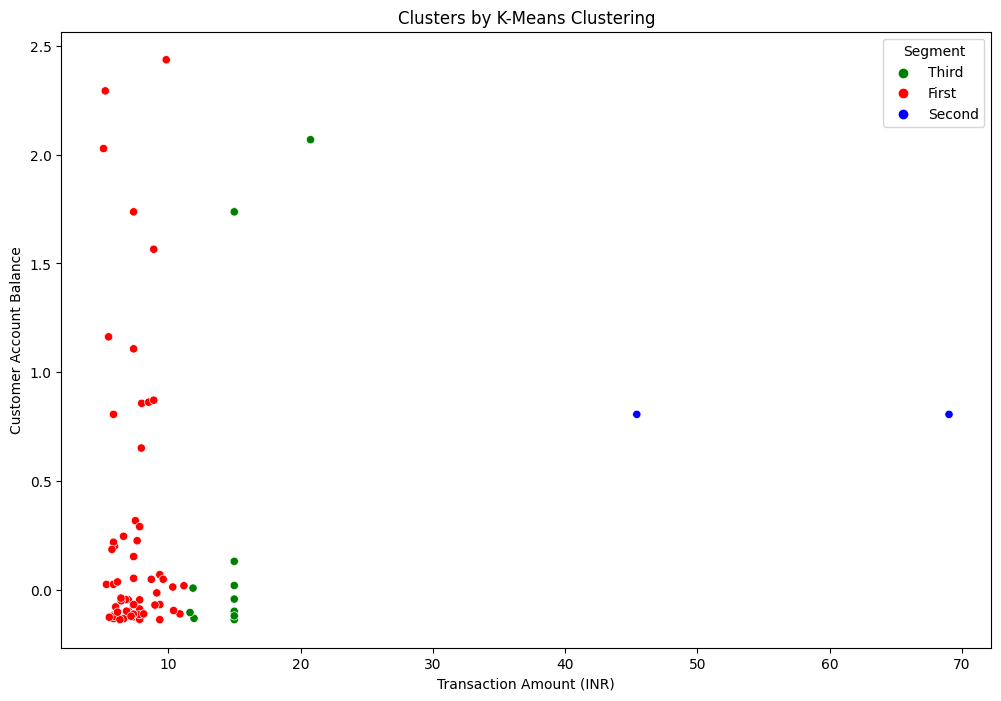

In [89]:
x_axis = data["TransactionAmount (INR)"]
y_axis = data["CustAccountBalance"]
plt.figure(figsize=(12, 8))
sns.scatterplot(x=x_axis, y=y_axis, hue=data["Segment"], palette=["g", "r", "b"])
plt.xlabel("Transaction Amount (INR)")
plt.ylabel("Customer Account Balance")
plt.title("Clusters by K-Means Clustering")
plt.show()

### Rendimiento de K-Means Clustering de libreria

In [90]:
from sklearn.metrics import davies_bouldin_score, calinski_harabasz_score

final_data = data.drop(["Segment", "Segment K-Means"], axis=1)

# calculate metrics
inertia = kmeans.inertia_
db = davies_bouldin_score(final_data, kmeans.labels_)
ch = calinski_harabasz_score(final_data, kmeans.labels_)

print(f"Inertia: {inertia}\nDavies-Bouldin Index: {db}\nCalinski-Harabasz Index: {ch}")

Inertia: 1729.6468877838433
Davies-Bouldin Index: 0.3990255011942017
Calinski-Harabasz Index: 396.8314711114971
